# コード2-2：最小二乗法によるパラメータ推定の実装

『ウイルス感染の数理モデルとシミュレーション ーデータを定量的に理解するー』

このコードでは最小二乗法を用いて数理モデル中のパラメータを推定する例をまとめる。

## ライブラリ、パッケージ（モジュール）の読み込み

In [163]:
## 必要があればインストール
# install.packages("ggplot2")

In [164]:
rm(list = ls(all = TRUE))
library(ggplot2)

## データの準備

### 線形のデータ

１次関数で表される式

$$
y \left( t \right) = \beta_{1} t + \beta_{0}
$$

について、$\beta_{0} = 1, \beta_{1} = 2$を真の値とする。

正規分布$\mathcal{N}(0, 1)$に従う乱数を加えたデータを作成し、単純線形回帰で$\beta_{0}, \beta_{1}$を推定する。

In [165]:
## 1次関数
model_linear <- function(t, beta0, beta1) {
    return(beta1*t + beta0)
}

In [166]:
## 真のパラメータの値
beta0_true <- 1
beta1_true <- 2

t_data_linear <- seq(0, 9, by = 1)

set.seed(seed = 30)

y_true_linear <- model_linear(t_data_linear, beta0_true, beta1_true)

y_data_linear <- y_true_linear + rnorm(n = length(t_data_linear), mean = 0, sd = 1)

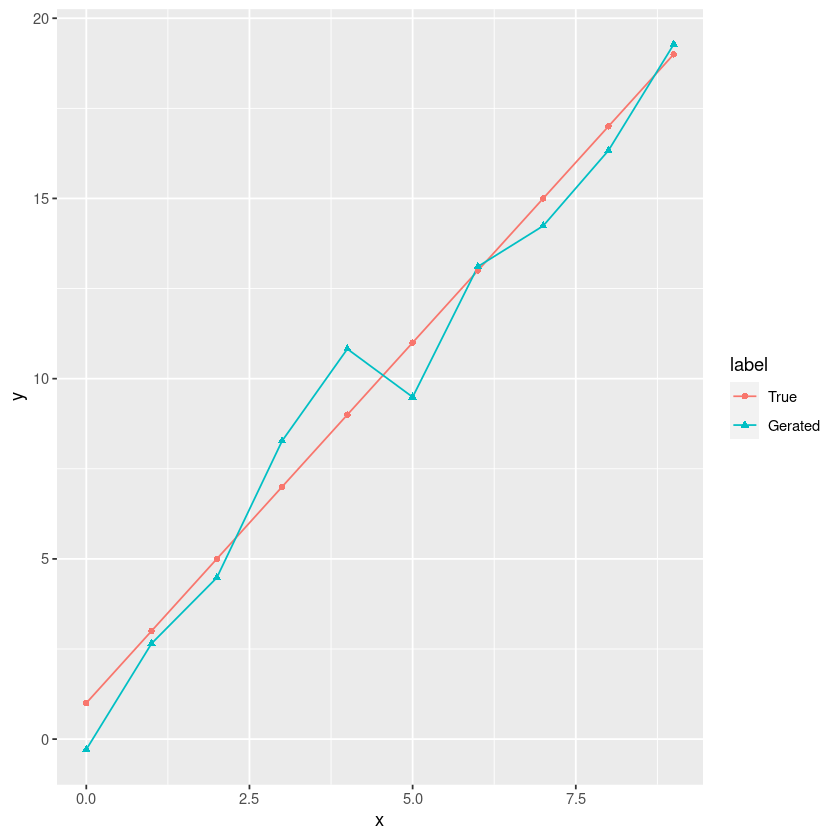

In [167]:
## 生成したデータのプロット
ggplot(data = data.frame(x = rep(t_data_linear, 2),
                         y = c(y_true_linear, y_data_linear),
                         label = factor(rep(c("True", "Gerated"), each = length(t_data_linear)),
                                        levels = c("True", "Gerated"))),
       aes(x = x, y = y, color = label, shape = label)) +
    geom_line() +
    geom_point()

### 非線形のデータ

指数関数で表される式

$$
V \left( t \right) = V( 0 ) \exp \left( Gt \right)
$$

について、$V(0) = 10, G = 0.2$を真の値とする。

対数正規分布$\Lambda(0, 1)$に従う乱数を加えたデータを作成し、非線形最小二乗法で$V(0), G$を推定する。

In [168]:
model_nonlinear <- function(t, v0, g) {
    return(v0*exp(g*t))
}

In [169]:
## 真のパラメータの値
v0_true <- 10
g_true <- 0.2

t_data_nonlinear <- seq(0, 9, by = 1)

set.seed(seed = 37)

y_true_nonlinear <- model_nonlinear(t_data_nonlinear, v0_true, g_true)

y_data_nonlinear <- y_true_nonlinear + exp(rnorm(n = length(t_data_nonlinear), mean = 0, sd = 1))

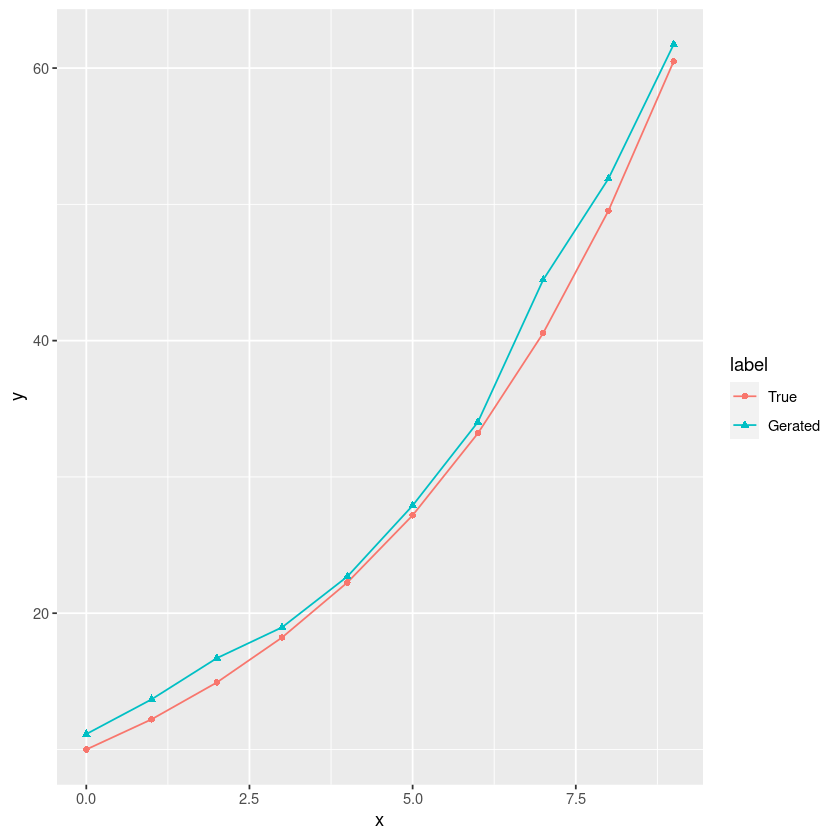

In [170]:
## 生成したデータのプロット
ggplot(data = data.frame(x = rep(t_data_nonlinear, 2),
                         y = c(y_true_nonlinear, y_data_nonlinear),
                         label = factor(rep(c("True", "Gerated"), each = length(t_data_nonlinear)),
                                        levels = c("True", "Gerated"))),
       aes(x = x, y = y, color = label, shape = label)) +
    geom_line() +
    geom_point()

## 手計算による単純線形回帰

データ$Y = \left\{ y_1, y_2, \ldots ,y_{n} \right\}$に対して、

$$
\begin{align}
y_i &= y \left( t_i \right) + \varepsilon_i \\
    &= \beta_{1} t_i + \beta_{0} + \varepsilon_i
\end{align}
$$

（$t_i$はデータ$y_i$が観察された時刻、$\varepsilon_i$はデータ$y_i$に対する残差）を考えたときに、残差の二乗和は以下のように表される：

$$
S \left( \beta_0, \beta_1\right) = \sum_{i=1}^{n}{\left(y_i - \beta_{1} t_i - \beta_{0}\right)^2}
$$

$S \left( \beta_0, \beta_1\right)$を最小にするパラメータ$\beta_0, \beta_1$を求めれば良いので、以下の連立方程式

$$
\begin{cases}
\displaystyle \frac{\partial S \left( \beta_0, \beta_1 \right)}{\partial \beta_0} = 0 \\
\displaystyle \frac{\partial S \left( \beta_0, \beta_1 \right)}{\partial \beta_1} = 0
\end{cases}
$$

を解くと、

$$
\beta_0 = \frac{\displaystyle\sum_{i=1}^{n}{{t_i}^2} \sum_{i=1}^{n}{y_i} -
                    \sum_{i=1}^{n}{t_i} \sum_{i=1}^{n}{t_i y_i}}
                {\displaystyle n \sum_{i=1}^{n}{{t_i}^2} - 
                    \left( \sum_{i=1}^{n}{t_i} \right)^2},
\beta_1 = \frac{\displaystyle n \sum_{i=1}^{n}{t_i y_i} -
                    \sum_{i=1}^{n}{t_i} \sum_{i=1}^{n}{y_i}}
                {\displaystyle n \sum_{i=1}^{n}{{t_i}^2} - 
                    \left( \sum_{i=1}^{n}{t_i} \right)^2}
$$

が得られる。

In [171]:
## y_i: y_data_linear[i], t_i: t_data_linear[i]
beta0_est <- (sum(t_data_linear ** 2) * sum(y_data_linear) - 
              sum(t_data_linear) * sum(t_data_linear * y_data_linear)) /
              (length(t_data_linear) * sum(t_data_linear ** 2) -  sum(t_data_linear) ** 2)

beta1_est <- (length(t_data_linear) * sum(t_data_linear * y_data_linear) -
              sum(t_data_linear) * sum(y_data_linear)) /
              (length(t_data_linear) * sum(t_data_linear ** 2) - sum(t_data_linear) ** 2)

In [172]:
## 推定値
print(c(beta0_est, beta1_est))

[1] 0.7349186 2.0229777


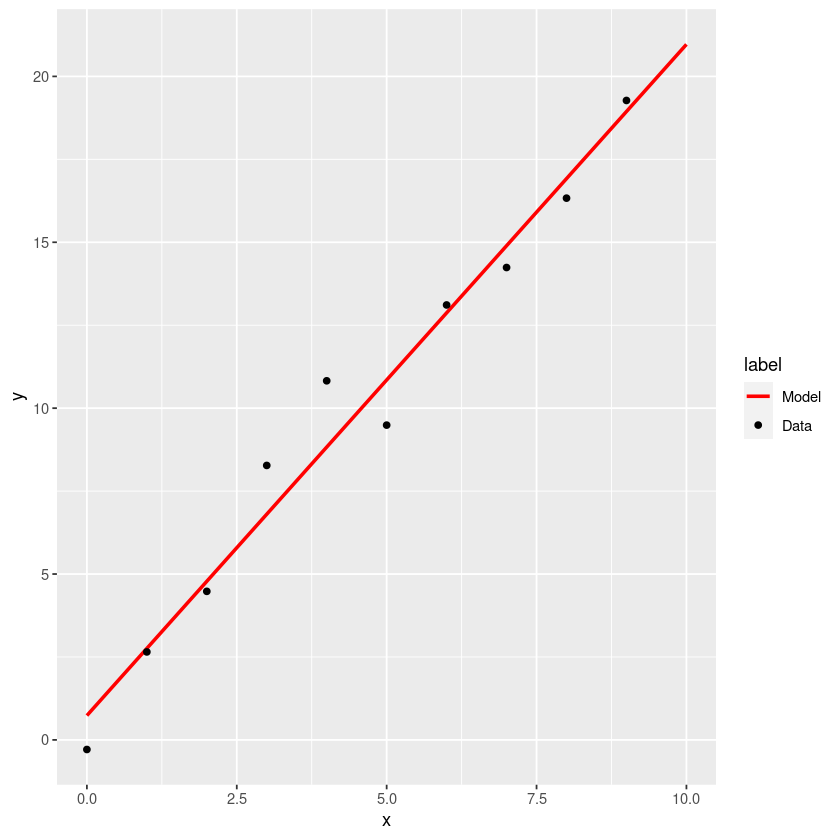

In [173]:
## パラメータの推定値を用いてプロット
stime <- seq(0, 10, length = 100)
data_plot <- data.frame(x = c(stime, t_data_linear),
                        y = c(model_linear(stime, beta0_est, beta1_est), y_data_linear),
                        label = factor(c(rep("Model", length(stime)), rep("Data", length(t_data_linear))),
                                       levels = c("Model", "Data")))

ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_line(aes(linewidth = label), color = "red") +
    geom_point(aes(color = label)) +
    scale_color_manual(values = c(Model = "#ffffff00", Data = "black")) +
    scale_linewidth_manual(values = c(Model = 1, Data = 0))

## 単純線形回帰（関数を利用）

ここではbaseライブラリのlm関数を用いる。

In [174]:
res_linear <- lm(y_data_linear ~ t_data_linear)
summary(res_linear)


Call:
lm(formula = y_data_linear ~ t_data_linear)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3611 -0.6396 -0.2040  0.3090  1.9977 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.7349     0.6603   1.113    0.298    
t_data_linear   2.0230     0.1237  16.355 1.97e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.124 on 8 degrees of freedom
Multiple R-squared:  0.971,	Adjusted R-squared:  0.9673 
F-statistic: 267.5 on 1 and 8 DF,  p-value: 1.968e-07


In [175]:
## 推定値、手計算で求めた値と同じ
coef(res_linear)

(Intercept) t_data_linear 
    0.7349186     2.0229777

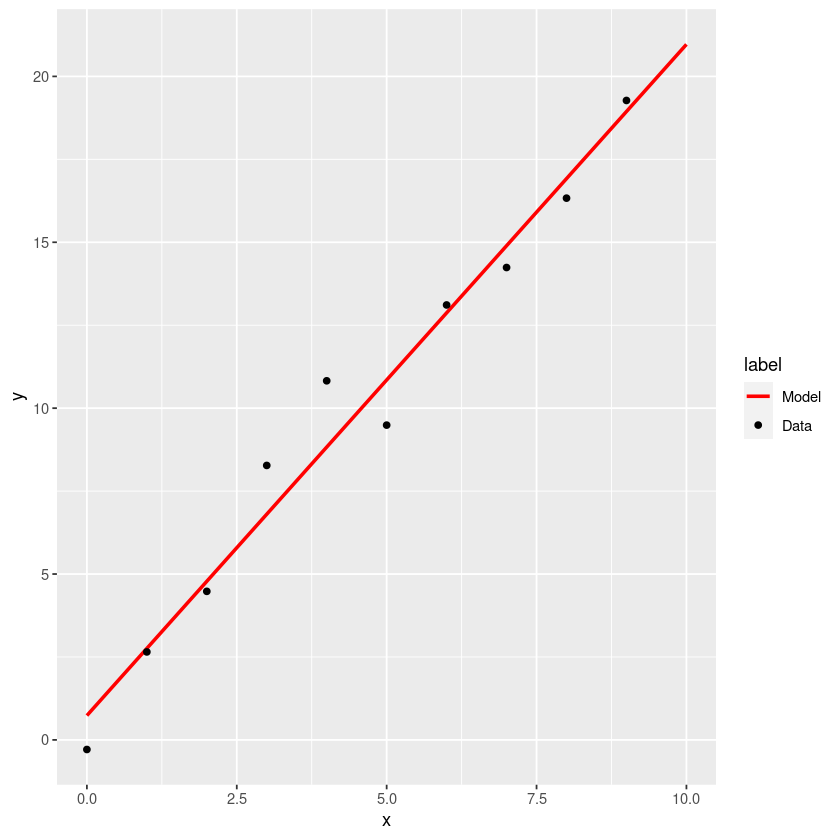

In [176]:
## パラメータの推定値を用いてプロット
stime <- seq(0, 10, length = 100)
data_plot <- data.frame(x = c(stime, t_data_linear),
                        y = c(model_linear(stime, as.numeric(coef(res_linear)[1]), as.numeric(coef(res_linear)[2])),
                              y_data_linear),
                        label = factor(c(rep("Model", length(stime)), rep("Data", length(t_data_linear))),
                                       levels = c("Model", "Data")))

ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_line(aes(linewidth = label), color = "red") +
    geom_point(aes(color = label)) +
    scale_color_manual(values = c(Model = "#ffffff00", Data = "black")) +
    scale_linewidth_manual(values = c(Model = 1, Data = 0))

## 単純線形回帰（最小化アルゴリズムベース）

残差の二乗和を最小にするパラメータの組み合わせを求めれば良いので、以下の関数を最小にする$\beta_0, \beta_1$を数値計算により探索することでパラメータを推定することもできる。

$$
S \left( \beta_0, \beta_1\right) = \sum_{i=1}^{n}{\left(y_i - \beta_{1} t_i - \beta_{0}\right)^2}
$$

ここではstatsライブラリに含まれるoptim関数を用いる。

最小化アルゴリズムは"Nelder-Mead"を指定する。

https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/optim

In [177]:
## 最小化する関数の定義
## ここではtとパラメータ（beta_0, beta_1）を引数として残差の二乗和を返す関数
## beta[1]: beta_0, beta[2]: beta_1
ls_linear <- function(beta, args) {
    return(sum((y_data_linear - model_linear(args, beta[1], beta[2])) ** 2))
}

In [178]:
## 推定初期値（探索を始める最初の値）
beta00 = c(3, 1)

set.seed(seed = 12)

## Nelder-Mead法によるbeta_0, beta_1の推定
res_linear_op <- optim(par = beta00, fn = ls_linear, method = "Nelder-Mead", args = t_data_linear)

In [179]:
## 推定値
## 厳密な解とほぼ同じだが少し違う
print(res_linear_op$par)

[1] 0.7344738 2.0231322


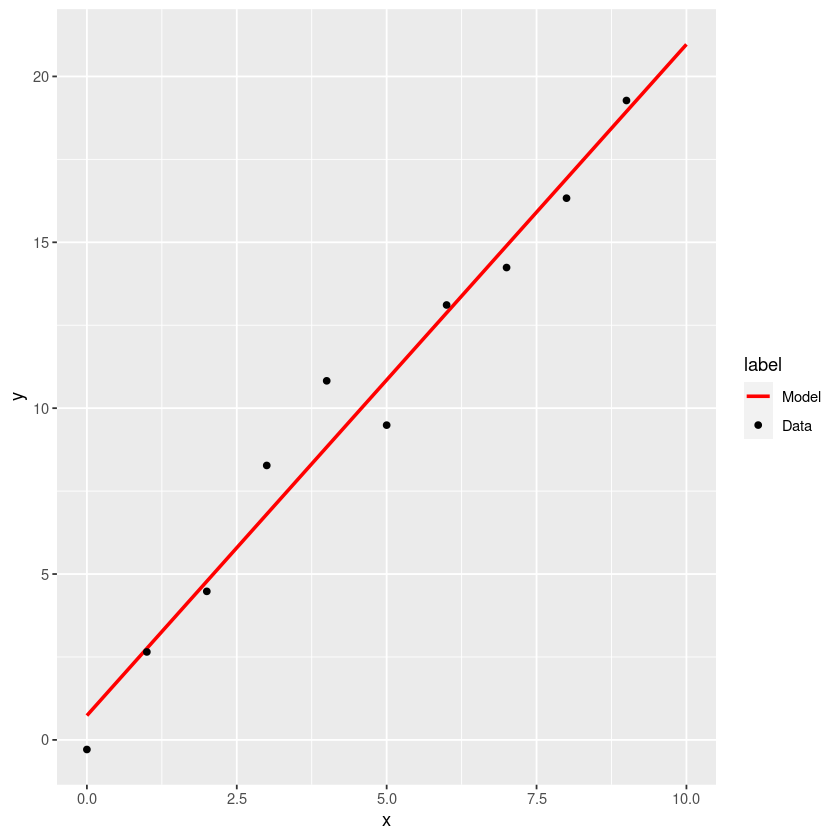

In [180]:
## パラメータの推定値を用いてプロット
stime <- seq(0, 10, length = 100)
data_plot <- data.frame(x = c(stime, t_data_linear),
                        y = c(model_linear(stime, res_linear_op$par[1], res_linear_op$par[2]),
                              y_data_linear),
                        label = factor(c(rep("Model", length(stime)), rep("Data", length(t_data_linear))),
                                       levels = c("Model", "Data")))

ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_line(aes(linewidth = label), color = "red") +
    geom_point(aes(color = label)) +
    scale_color_manual(values = c(Model = "#ffffff00", Data = "black")) +
    scale_linewidth_manual(values = c(Model = 1, Data = 0))

## 非線形最小二乗法

説明変数$y_i$と目的変数$t_i$が非線形の関係の場合、つまり

$$
y_i = f(t_i) + \varepsilon_i
$$

で関数$f(t)$が非線形関数である場合は、一般にパラメータを数値計算で推定する。

In [181]:
## 最小化する関数の定義
## ここではtとパラメータ（v(0), G）を引数として残差の二乗和を返す関数
## pars[0]: V(0), pars[1]: G
ls_nonlinear <- function(pars, args) {
  return(sum((y_data_nonlinear - model_nonlinear(args, pars[1], pars[2])) ** 2))
}

In [182]:
## 推定初期値（探索を始める最初の値）
pars00 <- c(20, 1)

## Nelder-Mead法によるV(0), Gの推定
res_nonlinear_op <- optim(par = pars00, fn = ls_nonlinear, method = "Nelder-Mead",
                          control = list(reltol = 1e-16), args = t_data_nonlinear)

In [183]:
## 推定値
print(res_nonlinear_op$par)

[1] 10.865832  0.194361


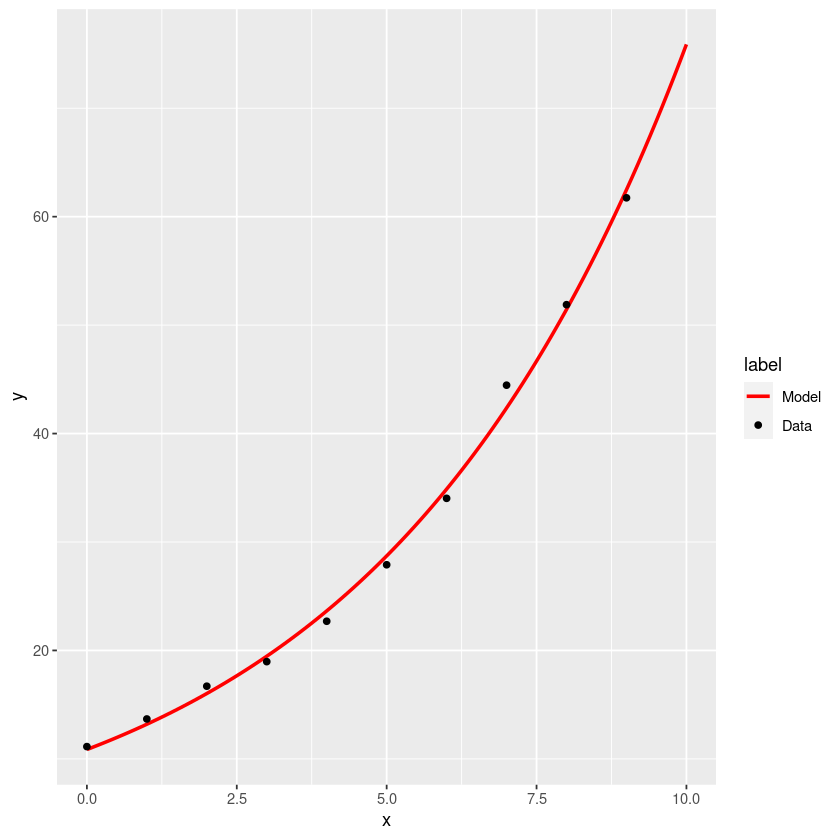

In [184]:
## パラメータの推定値を用いてプロット
stime <- seq(0, 10, length = 100)
data_plot <- data.frame(x = c(stime, t_data_nonlinear),
                        y = c(model_nonlinear(stime, res_nonlinear_op$par[1], res_nonlinear_op$par[2]),
                              y_data_nonlinear),
                        label = factor(c(rep("Model", length(stime)), rep("Data", length(t_data_nonlinear))),
                                       levels = c("Model", "Data")))

ggplot(data = data_plot, aes(x = x, y = y)) +
    geom_line(aes(linewidth = label), color = "red") +
    geom_point(aes(color = label)) +
    scale_color_manual(values = c(Model = "#ffffff00", Data = "black")) +
    scale_linewidth_manual(values = c(Model = 1, Data = 0))

※ 式（2.5）のように対数変換をすることで、対数正規分布で与えた誤差が正規分布となるので、正確な推定ができる。